<!--HEADER-->
*[Guia de aulas da disciplina de Modelagem Matemática](https://github.com/rmsrosa/modelagem_matematica) do [IM-UFRJ](https://www.im.ufrj.br).*

<!--NAVIGATOR-->

<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/master/aulas/05.00-Aula5.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
&nbsp;
<a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/master?filepath=aulas/05.00-Aula5.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>
&nbsp;

[<- Aula 4: Estimativa básica de propagação de erros experimentais](04.00-Aula4.ipynb) | [Página Inicial](00-Sumario.ipynb) 

---


# Aula 5: Incerteza e intervalos e graus de confiança

### Objetivos

- Revisitar a ideia de intervalos e graus de confiança
- Aplicação na análise do pêndulo

## Importando bibliotecas e definindo funções a serem usadas abaixo

In [1]:
from os import path
from IPython.display import Image
from IPython.display import HTML

def path_files_aula5(filename):
    return path.join('..', 'dados', 'incertezas', filename)

## Incertezas e intervalos e graus de confiança

Consideramos uma distribuição de probabilidades qualquer, com média $\mu$ e desvio padrão $\sigma$. Dada uma amostra $q_1, \ldots, q_N$ dessa distribuição, definimos o **valor médio da amostra**

$$ \bar q = \frac{q_1 + \ldots + q_N}{N},
$$ 

o **desvio padrão (corrigido) da amostra**

$$ s_q = \sqrt{\frac{1}{N-1}\sum_i (q_{i}-\bar q)^2}
$$

e o **erro padrão da amostra**

$$ \Delta q  = \frac{s_q}{\sqrt{N}}
$$

Com base nisso, temos vários intervalos de confiança, por exemplo

$$ I_{65\%} = [\bar q - \Delta q, \;\bar q + \Delta q] \qquad I_{95\%} = [\bar q - 2\Delta q, \;\bar q + 2\Delta q]
$$

**Observação:** na prática, as barras de erro costumam ser feitas com um ou outro intervalo de confiança, mas é fundamental indicar qual deles está usando. Como a relação é simples, é fácil inferir um do outro.

## Ilustração

O teorema do limite central diz, essencialmente, que ...

Podemos usar as várias probabilidades implementadas no módulo `scipy.stats`, detalhadas em [SciPy - Statistical functions](https://docs.scipy.org/doc/scipy/reference/stats.html). Abaixo, usamos a distribuição **normal** [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) e a distribuição **beta** [scipy.stats.beta](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html).

### Escolhendo uma probabilidade, extraindo uma amostra e exibindo estatísticas

Começamos escolhendo uma distribuição de probabilidade:

In [2]:
import numpy as np
import scipy.stats as stats
import math

Nx=1000

def define_probabilidade(prob_nome, params):
    if prob_nome == 'normal':
        probability = stats.norm(**params)
    elif prob_nome == 'beta':
        probability = stats.beta(**params)
    return probability, params

parametros = {
    'normal': {'loc': 3, 'scale': 0.5},
    'beta': {'a': 3, 'b': 10}
}

prob_nome = 'normal'

probability, params = define_probabilidade(prob_nome, parametros[prob_nome])

mean, variance = probability.stats(moments='mv')
sigma = np.sqrt(variance)

x_pdf = np.linspace(probability.ppf(0.001), probability.ppf(0.999), Nx)
y_pdf = probability.pdf(x_pdf)

### Gráfico da função de distribuição da probabilidade

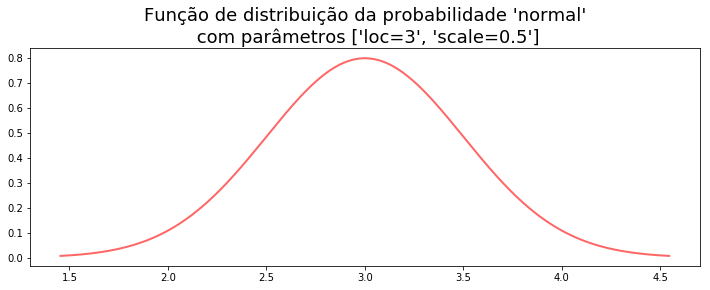

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(x_pdf, y_pdf,'r-', lw=2, alpha=0.6)
plt.title(f"Função de distribuição da probabilidade '{prob_nome}'\n com parâmetros {[f'{key}={value}' for key, value in parametros[prob_nome].items()]}", fontsize=18)
plt.savefig(path_files_aula5('funcao_distribuicao_da_probabilidade_'+prob_nome+'.png'), bbox_inches='tight', pad_inches=0.2,  dpi=150)

plt.show()


### Extraindo amostra

In [6]:
np.random.seed(14736122)

# Amostra

N = 2000
M = 5
K = int(N/M)

amostra = probability.rvs(N)
       
x_avg = np.mean(amostra)
x_loc_avg = np.array([np.mean(amostra[i*M:(i+1)*M]) for i in range(K)])
x_loc_std_corr = np.sqrt(M/(M-1))*np.array([np.std(amostra[i*M:(i+1)*M]) for i in range(K)])
x_loc_err = x_loc_std_corr/np.sqrt(M)
x_loc_avg_std = np.std(x_loc_avg)
x_log_avg_std_mean = np.mean(x_loc_std_corr)

### Exibindo algumas estatísticas

In [7]:
print(f'Média total das {N} amostras:', x_avg)
print(f'Média das primeiras {M} amostras:', x_loc_avg[0])
print(f'Desvio padrão das primeiras {M} amostras:', x_loc_std_corr[0])
print(f'Erro padrão das primeiras {M} amostras:', x_loc_err[0])
print(f'Intervalo de 66,4% de probabilidade: ({x_loc_avg[0] - x_loc_std_corr[0]},{x_loc_avg[0] + x_loc_std_corr[0]})')
print(f'Intervalo de 65% de confiança: ({x_loc_avg[0] - 0.96*x_loc_err[0]},{x_loc_avg[0] + 0.96*x_loc_err[0]})')
print(f'Média das médias de cada conjunto de {M} amostras: {np.mean(x_loc_avg)}')
print(f'Desvio padrão das {K} médias de cada conjunto de {M} amostras:', x_loc_avg_std)
print(f'Desvio padrão de cada conjunto de {M} amostras: {x_loc_avg_std}')
print(f'Média dos desvios padrão de cada conjunto de {M} amostras:', x_log_avg_std_mean)

print('\nObserve que a média total e a média das médias tem que coincidir, é só um teste de sanidade')

Média total das 2000 amostras: 2.9669652137393285
Média das primeiras 5 amostras: 2.7774223956836797
Desvio padrão das primeiras 5 amostras: 0.17257420738291107
Erro padrão das primeiras 5 amostras: 0.07717753177426705
Intervalo de 66,4% de probabilidade: (2.6048481883007684,2.949996603066591)
Intervalo de 65% de confiança: (2.703331965180383,2.851512826186976)
Média das médias de cada conjunto de 5 amostras: 2.966965213739328
Desvio padrão das 400 médias de cada conjunto de 5 amostras: 0.21416023503486875
Desvio padrão de cada conjunto de 5 amostras: 0.21416023503486875
Média dos desvios padrão de cada conjunto de 5 amostras: 0.4657300756775905

Observe que a média total e a média das médias tem que coincidir, é só um teste de sanidade


### Preparando animação

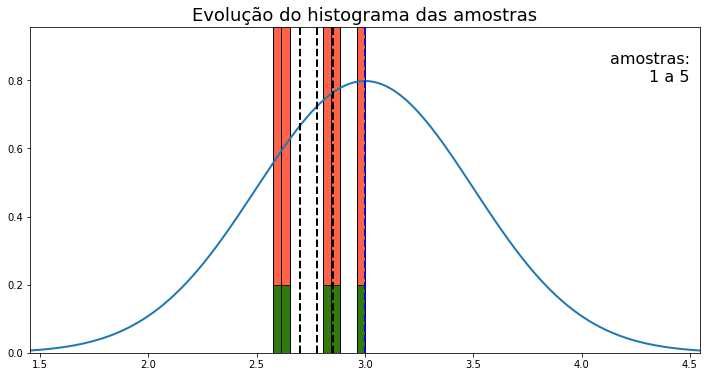

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as mtl_path
from matplotlib import animation

# histogram parameters

hist_range = (x_pdf[0],x_pdf[-1])
num_bins = 80

hist, bins = np.histogram(amostra[:M], bins=num_bins, range=hist_range)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + hist/M
nrects = len(left)

bin_length = right[0] - left[0]

nverts = nrects * (1 + 3 + 1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * mtl_path.Path.LINETO
codes[0::5] = mtl_path.Path.MOVETO
codes[4::5] = mtl_path.Path.CLOSEPOLY
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom

vertsN = np.zeros((nverts, 2))
vertsN[0::5, 0] = left
vertsN[0::5, 1] = bottom
vertsN[1::5, 0] = left
vertsN[1::5, 1] = top
vertsN[2::5, 0] = right
vertsN[2::5, 1] = top
vertsN[3::5, 0] = right
vertsN[3::5, 1] = bottom

patch = None
patchN = None

# prepare for animation

num_frames = 50

def animate(i):
    if i < 10:
        J = 1
    elif i < 15:
        J = 2
    elif i < 20:
        J = min(4, int(K/num_frames))
    else:
        J = int(K/num_frames)
    hist, bins = np.histogram(amostra[i*J*M:(i*J+1)*M], bins=num_bins, range=hist_range)
    histN, binsN = np.histogram(amostra[:(i*J+1)*M], bins=num_bins, range=hist_range)
    top = bottom + hist/max(hist)/np.sqrt(2*np.pi*variance)
    top = bottom + hist/sum(hist) #/bin_length
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    topN = bottom + histN/max(histN)/np.sqrt(2*np.pi*variance)
    topN = bottom + histN/sum(histN)/bin_length
    vertsN[1::5, 1] = topN
    vertsN[2::5, 1] = topN
    avg_loc_line.set_xdata([x_loc_avg[i],x_loc_avg[i]])
    avg_loc_minus_error.set_xdata([x_loc_avg[i]-x_loc_err[i],x_loc_avg[i]-x_loc_err[i]])
    avg_loc_plus_error.set_xdata([x_loc_avg[i]+x_loc_err[i],x_loc_avg[i]+x_loc_err[i]])
    anotacao.set_text(f'amostras:\n{i*J*M+1} a {(i*J+1)*M}')
    return [patchN, patch, avg_loc_line, avg_loc_minus_error, avg_loc_plus_error, anotacao, ]

fig, ax = plt.subplots(figsize=(12,6))
barpath = mtl_path.Path(verts, codes)
patch = patches.PathPatch(barpath, facecolor='green', edgecolor='black', alpha=0.8)

barpathN = mtl_path.Path(vertsN, codes)
patchN = patches.PathPatch(barpathN, facecolor='tomato', edgecolor='black', alpha=1)

line, = ax.plot(x_pdf, y_pdf, lw=2)
avg_line = ax.axvline(mean, linestyle='--', color='blue', lw=2)
#avg_loc_line_0 = ax.axvline(x_loc_avg[0], linestyle='--', color='green', lw=2)
avg_loc_line = ax.axvline(x_loc_avg[0], linestyle='--', color='black', lw=2)
avg_loc_minus_error = ax.axvline(x_loc_avg[0] - x_loc_err[0], linestyle='--', color='black', lw=2)
avg_loc_plus_error = ax.axvline(x_loc_avg[0] + x_loc_err[0], linestyle='--', color='black', lw=2)

ax.add_patch(patchN)
ax.add_patch(patch)

anotacao = ax.annotate(f'amostras:\n{1} a {M}', xy=(0.99*x_pdf[-1],np.max(y_pdf)), ha='right', fontsize=16)
#anotacao.set_animated(True)

ax.set_xlim(x_pdf[0], x_pdf[-1])
ax.set_ylim(0,1.2*np.max(y_pdf))

plt.title('Evolução do histograma das amostras', fontsize=18)

anim = animation.FuncAnimation(fig, animate, frames = num_frames, repeat=False, blit=True)

plt.show()

### Exibindo animação

In [9]:
HTML(anim.to_jshtml())

### Gravando a animação em "gif"

In [10]:
from matplotlib.animation import PillowWriter

anim.save(path_files_aula5('animacao_histograma_'+prob_nome+'.gif'), writer=PillowWriter(fps=24))

In [11]:
#HTML(path_files_aula5('animacao_histograma_'+prob_nome+'.gif'))

### Histograma das médias de cada grupo de amostras

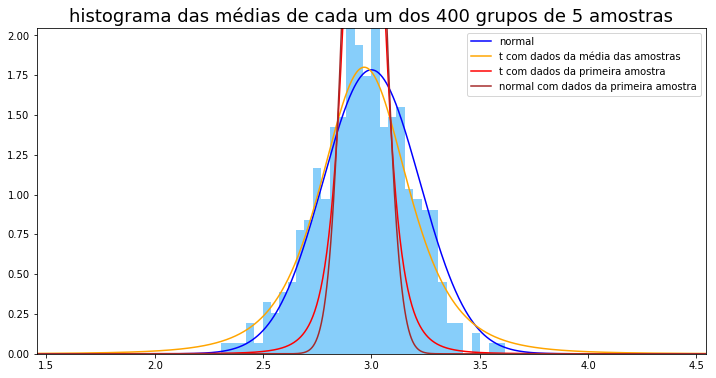

In [12]:
plt.figure(figsize=(12,6))

cor_hist = 'lightskyblue'
cor_linhas_hist = 'blue'

n, bins, patches = plt.hist(x_loc_avg, density=True, color=cor_hist, bins=num_bins, range=hist_range)

y_loc_pdf = stats.norm.pdf(x_pdf, mean, sigma/np.sqrt(M))
z_loc_pdf = stats.t.pdf(x_pdf, M-1, loc = mean, scale = sigma/np.sqrt(M))
w_loc_pdf = stats.t.pdf(x_pdf, M-1, loc = x_avg, scale = np.mean(x_loc_err))
u_loc_pdf = stats.norm.pdf(x_pdf, loc=x_avg, scale=x_loc_err[0])
v_loc_pdf = stats.t.pdf(x_pdf, M-1, loc = x_avg, scale = x_loc_err[0])

plt.plot(x_pdf, y_loc_pdf, color='blue', label = 'normal')
#plt.plot(x_pdf, z_loc_pdf, color='green', label = 't com dados da normal')
plt.plot(x_pdf, w_loc_pdf, color='orange', label = 't com dados da média das amostras')
plt.plot(x_pdf, v_loc_pdf, color='red', label = 't com dados da primeira amostra')
plt.plot(x_pdf, u_loc_pdf, color='brown', label = 'normal com dados da primeira amostra')

plt.xlim(x_pdf[0], x_pdf[-1])
plt.ylim(0,1.1/np.sqrt(2*np.pi)/x_loc_avg_std)

plt.legend()
plt.title(f'histograma das médias de cada um dos {K} grupos de {M} amostras', fontsize=18)
plt.savefig(path_files_aula5('histograma_medias_locais_'+prob_nome+'.png'), bbox_inches='tight', pad_inches=0.2,  dpi=150)

plt.show()

In [13]:
#HTML(path_files_aula5('histograma_medias_locais_'+prob_nome+'.png'))

## Início da lista de exercícios

Para cada comprimento $l$, pegar o arquivo correspondente dos dados do movimento do pêndulo (iluminância e proximidade) e fazer as seguintes análises:

1. Extrair dos uma coleção de instantes $(t_1, ... , t_n)$ entre cada dois mínimos (pontos de proximidade), ou cada dois máximos (longe da sensor), que são informações sobre o período do movimento (a cada dois pois o pêndulo passa a cada meio-período sobre o sensor). Pode desprezar os *outliers*.
1. Plotar esta amostra em um histograma.
1. Achar a média $\bar t$ e o desvio padrão corrigido $s_t$ dessa amostra.
1. Achar o erro padrão $\Delta t$ desta quantidade. 
1. Assumindo que na medição do comprimento $l$ há uma incerteza de $e_l \simeq 1\%$, estimar o erro na quantidade derivada $$ g \equiv g(t,l) = 4 \pi^2 l/(2t)^2.$$
1. Verificar se o valor tabulado $g_e = 9.8 m/s^2$ cai dentro da margem de erro para cada $l$.

## Continuação da lista de exercícios

Juntando a análise anterior de todos os comprimentos:

1. Fazer uma figura com os valores encontrados $(\ell_i, \bar t_i)$, para cada comprimento considerado $\ell_i$ e cada período médio correspondente $\bar t_i$, incluindo as barras de erro assumindo $1\%$ na estimativa de $\ell_i$ e barras com um intervalo de confiança $\bar t_i - 2 \Delta t_i,$ correspondendo a um grau de confiança da ordem de $95\%$.
1. Fazer uma regressão dos valores $t$ versus $l$ do tipo $l = a (2t)^2$.
1. Estimar a incerteza induzida na quantidade $a = a(t,l)$.
1. Deduzir $g$ usando $a$ e comparar a estimativa do erro com a que vem dos $l$'s individuais, concluindo com qual método é mais preciso.

## Apresentação em slides:

Para visualizar na forma de slides, abrir um "terminal" *bash* e usar a linha de comando
```bash
jupyter nbconvert 05.00-Aula5.ipynb --to slides --post serve
```

Se quiser adicionar a possibilidade de rolar a página, caso algum *slide* seja muito longo, incluir a opção
```bash
--SlidesExporter.reveal_scroll=True
```

Para usar um tema diferente do padrão, temos a configuração via `SlidesExporter.reveal_theme`. Os temas disponíveis são `beige`, `black`, `blood`, `league`, `moon`, `night`, `serif`, `simple`, `sky`, `solarized`, `white`. O padrão é `white`. Um tema interessante é
```bash
--SlidesExporter.reveal_theme=solarized
```

Para usar um efeito de transição diferente do padrão, temos a configuração via `SlidesExporter.reveal_transition`. As opções são `none`, `fade`, `slide`, `convex`, `concave` e `zoom`. O padrão é `slide`. Uma transição interessante é 
```bash
--SlidesExporter.reveal_transition=convex
```

Mais informações sobre o `nbconvert` em [Configuration options (for nbconvert)](https://nbconvert.readthedocs.io/en/latest/config_options.html) e [Present Your Data Science Projects with Jupyter Notebook Slides!](https://medium.com/learning-machine-learning/present-your-data-science-projects-with-jupyter-slides-75f20735eb0f)

<!--NAVIGATOR-->

---
[<- Aula 4: Estimativa básica de propagação de erros experimentais](04.00-Aula4.ipynb) | [Página Inicial](00-Sumario.ipynb) 

<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/master/aulas/05.00-Aula5.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

<a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/master?filepath=aulas/05.00-Aula5.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>
&nbsp;